# HK-cities Dataset

## Characteristics Only

### Data import and drop unnecessary rows

In [368]:
import pandas as pd
import matplotlib.pyplot as plt
#prevent SettingWithCopyWarning message from appearing
pd.options.mode.chained_assignment = None

hk_cities = pd.read_csv('./Data/HK_cities.csv', dtype={'plz': object, 'zimmeranzahl': object, 'click_customer': object})

df_hk_cities = pd.DataFrame(hk_cities)

#All columns sorted by category
#Independent and dependent variabels, columns which will not be dropped: edat, zimmeranzahl, schlafzimmer, badezimmer, wohnflaeche, grundstuecksflaeche, objektzustand, parkplatz, price_sqm, kaufpreis
time_information = ['adat']
object_features = [ 'ausstattung', 'denkmalobjekt', 'einbaukueche', 'ferienhaus', 'gaestewc', 'garten', 'haustier_erlaubt', 'kategorie_Haus']
general_object_information = ['bauphase', 'einliegerwohnung', 'foerderung', 'immobilientyp', 'kaufvermietet', 'mieteinnahmenpromonat', 'nebenraeume', 'rollstuhlgerecht']
area_information = ['nutzflaeche']
energy_and_structure_information = ['energieausweistyp', 'energieeffizienzklasse', 'ev_kennwert', 'ev_wwenthalten', 'heizkosten', 'heizungsart', 'letzte_modernisierung']
price_information = ['parkplatzpreis']
regional_information = ['gid2019', 'kid2019', 'ergg_1km', 'blid']
meta_information_advertisement = ['click_customer', 'click_schnellkontakte', 'click_url', 'click_weitersagen', 'hits', 'laufzeittage', 'hits_gen']
technical_variables = ['bef1', 'bef2', 'bef3', 'bef4', 'bef5', 'bef6', 'bef7', 'bef8', 'bef9', 'bef10', 'anbieter', 'duplicateid', 'spell', 'click_schnellkontakte_gen', 'click_weitersagen_gen', 'click_url_gen']
other_variables = ['liste_show', 'liste_match', 'liste_show_gen', 'liste_match_gen']

columns_to_drop = time_information + object_features + general_object_information + area_information + energy_and_structure_information + price_information + regional_information + meta_information_advertisement + technical_variables + other_variables
df_hk_cities.drop(columns=columns_to_drop, axis=1, inplace=True)

print(df_hk_cities.shape)
print(df_hk_cities.isna().sum())
print(len(df_hk_cities[df_hk_cities.kaufpreis == 'Other missing']))
df_hk_cities.describe(include='all')

(367583, 14)
obid                       0
plz                        0
kaufpreis                  0
baujahr                65931
wohnflaeche                0
grundstuecksflaeche        0
zimmeranzahl               0
schlafzimmer               0
badezimmer                 0
keller                     0
parkplatz                  0
objektzustand              0
edat                       0
price_sqm                  0
dtype: int64
0


,obid,plz,kaufpreis,baujahr,wohnflaeche,grundstuecksflaeche,zimmeranzahl,schlafzimmer,badezimmer,keller,parkplatz,objektzustand,edat,price_sqm
count,3.675830e+05,367583,3.675830e+05,301652.000000,367583.000000,367583,367583,367583,367583,367583,367583,367583,367583,367583.000000
unique,NaN,1990,NaN,NaN,NaN,5146,69,31,19,3,3,11,192,NaN
top,NaN,12623,NaN,NaN,NaN,Other missing,5,Other missing,Other missing,No,Other missing,Not specified,2022m12,NaN
freq,NaN,4741,NaN,NaN,NaN,17599,100391,161485,129915,157197,257098,130070,4452,NaN
mean,8.208446e+07,NaN,4.800137e+05,1973.217453,173.791503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2825.887905
std,2.919146e+07,NaN,3.417242e+05,39.497884,86.250859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1512.571668
min,2.558698e+07,NaN,2.526000e+04,1500.000000,60.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209.250700
25%,5.710773e+07,NaN,2.490000e+05,1952.000000,121.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1733.337950
50%,7.709574e+07,NaN,3.800000e+05,1978.000000,145.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2485.875700
75%,1.073314e+08,NaN,5.990000e+05,2008.000000,196.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3600.000000


### Data Cleaning of relevant columns

In [369]:
df_hk_cities['edat_year'] = df_hk_cities['edat'].astype(str).str[:4]
df_hk_cities['edat_year'] = pd.to_numeric(df_hk_cities['edat_year'])

df_original = df_hk_cities.copy(deep=True)
df_original_2 = df_hk_cities.copy(deep=True)

df_characteristics = df_original[df_original['baujahr'].notna()]
df_characteristics['age'] = df_characteristics['edat_year'] - df_characteristics['baujahr']

df_characteristics = df_characteristics[df_characteristics['zimmeranzahl'].notna()]
df_characteristics = df_characteristics[~df_characteristics['zimmeranzahl'].str.contains("Implausible value")]
df_characteristics['zimmeranzahl'] = pd.to_numeric(df_characteristics['zimmeranzahl'])
df_characteristics = df_characteristics[(df_characteristics['zimmeranzahl'] > 0) & (df_characteristics['zimmeranzahl'] < 30)]

df_characteristics = df_characteristics[df_characteristics['schlafzimmer'].notna()]
df_characteristics = df_characteristics[~df_characteristics['schlafzimmer'].str.contains("Other missing")]
df_characteristics = df_characteristics[~df_characteristics['schlafzimmer'].str.contains("Implausible value")]
df_characteristics['schlafzimmer'] = pd.to_numeric(df_characteristics['schlafzimmer'])
df_characteristics = df_characteristics[(df_characteristics['schlafzimmer'] > 0) & (df_characteristics['schlafzimmer'] < 15)]

df_characteristics = df_characteristics[df_characteristics['badezimmer'].notna()]
df_characteristics = df_characteristics[~df_characteristics['badezimmer'].str.contains("Other missing")]
df_characteristics = df_characteristics[~df_characteristics['badezimmer'].str.contains("Implausible value")]
df_characteristics['badezimmer'] = pd.to_numeric(df_characteristics['badezimmer'])
df_characteristics = df_characteristics[(df_characteristics['badezimmer'] > 0) & (df_characteristics['badezimmer'] < 15)]

df_characteristics = df_characteristics[df_characteristics['wohnflaeche'].notna()]
df_characteristics['wohnflaeche'] = pd.to_numeric(df_characteristics['wohnflaeche'])
df_characteristics = df_characteristics[(df_characteristics['wohnflaeche'] > 0) & (df_characteristics['wohnflaeche'] < 5000)]

df_characteristics = df_characteristics[df_characteristics['grundstuecksflaeche'].notna()]
df_characteristics = df_characteristics[~df_characteristics['grundstuecksflaeche'].str.contains("Other missing")]
df_characteristics = df_characteristics[~df_characteristics['grundstuecksflaeche'].str.contains("Implausible value")]
df_characteristics['grundstuecksflaeche'] = pd.to_numeric(df_characteristics['grundstuecksflaeche'])
df_characteristics = df_characteristics[(df_characteristics['grundstuecksflaeche'] > 0) & (df_characteristics['grundstuecksflaeche'] < 5000)]

df_characteristics = df_characteristics[~df_characteristics['objektzustand'].str.contains("Not specified")]
df_characteristics = df_characteristics[~df_characteristics['objektzustand'].str.contains("By arrangement")]
df_characteristics['objektzustand'] = df_characteristics['objektzustand'].astype('category')
df_characteristics['objektzustand'] = df_characteristics['objektzustand'].cat.reorder_categories(['Dilapidated', 'Needs renovation', 'Well kempt', 'Modernised', 'Reconstructed', 'Completely renovated', 'Like new', 'First occupancy after reconstruction', 'First occupancy'], ordered=True)
df_characteristics['objektzustand'] = df_characteristics['objektzustand'].cat.codes

df_characteristics['parkplatz'] = df_characteristics['parkplatz'].str.replace('Other missing', 'No')
df_characteristics['parkplatz'] = df_characteristics['parkplatz'].astype('category')
df_characteristics['parkplatz'] = df_characteristics['parkplatz'].cat.reorder_categories(['No', 'Yes'], ordered=True)
df_characteristics['parkplatz'] = df_characteristics['parkplatz'].cat.codes

df_characteristics['keller'] = df_characteristics['keller'].str.replace('Other missing', 'No')
df_characteristics['keller'] = df_characteristics['keller'].astype('category')
df_characteristics['keller'] = df_characteristics['keller'].cat.reorder_categories(['No', 'Yes'], ordered=True)
df_characteristics['keller'] = df_characteristics['keller'].cat.codes

#df_characteristics['kaufpreis'] = pd.to_numeric(df_characteristics['kaufpreis'])
#df_characteristics['kaufpreis'] = df_characteristics['kaufpreis'] * 0.9

print(df_characteristics.shape)
df_characteristics.head()

(132431, 16)


,obid,plz,kaufpreis,baujahr,wohnflaeche,grundstuecksflaeche,zimmeranzahl,schlafzimmer,badezimmer,keller,parkplatz,objektzustand,edat,price_sqm,edat_year,age
5,41283408,22415,150000.0,1956.0,100.0,1000.0,4.0,3,1,0,1,1,2007m5,1500.0000,2007,51.0
9,41172942,22419,290000.0,1964.0,189.0,600.0,8.0,5,3,0,0,2,2007m6,1534.3915,2007,43.0
12,40161496,22149,398000.0,1900.0,229.0,1113.0,11.0,5,3,0,1,1,2007m5,1737.9912,2007,107.0
18,41868056,22143,359000.0,1979.0,160.0,424.0,5.0,3,2,0,1,3,2007m8,2243.7500,2007,28.0
19,42725616,22459,429000.0,2008.0,120.0,330.0,5.0,2,1,0,1,8,2007m8,3575.0000,2007,-1.0


### Overview of the Sample

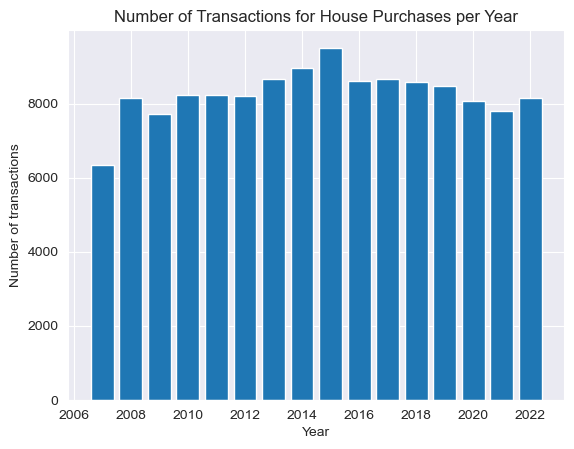

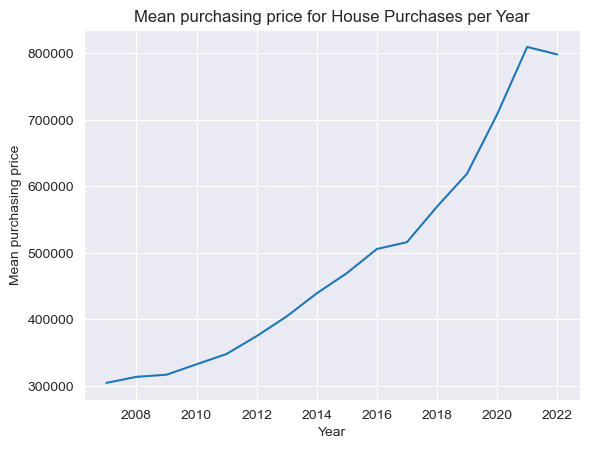

                  ort  transactions
0              Berlin         24030
1                Köln         13666
2             Hamburg         12168
3            Duisburg         11568
4              Bremen         11102
5             München          7351
6          Düsseldorf          6848
7            Dortmund          6365
8            Hannover          6274
9   Frankfurt am Main          6197
10              Essen          5874
11           Nürnberg          5719
12          Stuttgart          5497


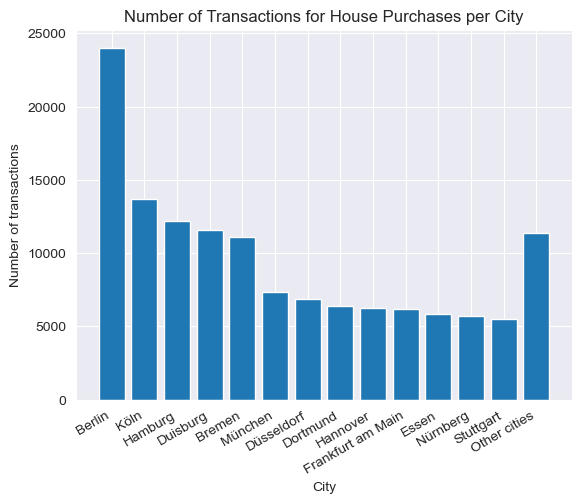

In [370]:
df_data_overview = df_characteristics.copy(deep=True)
number_of_transactions_per_year = df_data_overview.groupby('edat_year')['price_sqm'].count()
plt.bar(number_of_transactions_per_year.index, number_of_transactions_per_year.values)
plt.xlabel("Year")
plt.ylabel('Number of transactions')
plt.title('Number of Transactions for House Purchases per Year')
plt.show()

average_price_sqm_per_year = df_data_overview.groupby('edat_year')['kaufpreis'].mean()
plt.plot(average_price_sqm_per_year.index, average_price_sqm_per_year.values)
plt.xlabel("Year")
plt.ylabel('Mean purchasing price')
plt.title('Mean purchasing price for House Purchases per Year')
plt.show()


plz_city = pd.read_csv('./Data/zuordnung_plz_ort.csv', dtype={'plz': object})
plz_city.drop('osm_id', axis=1, inplace=True)
df_plz_city = pd.DataFrame(plz_city)

df_data_overview = pd.merge(df_data_overview, df_plz_city, how="left", on="plz")

big_cities = ['Hamburg', 'Hannover', 'Bremen', 'Düsseldorf', 'Essen', 'Duisburg', 'Köln', 'Dortmund', 'Frankfurt am Main', 'Stuttgart', 'München', 'Nürnberg', 'Berlin', 'Dresden', 'Leizig']
df_big_cities = df_data_overview[df_data_overview['ort'].isin(big_cities)]
df_not_big_cities = df_data_overview[~df_data_overview['ort'].isin(big_cities)]
number_of_transaction_not_big_cities = df_not_big_cities['obid'].count()
number_of_transactions_big_cities = df_big_cities['obid'].count()

count_by_ort = df_big_cities.groupby('ort')['obid'].count().sort_values(ascending=False).reset_index(name='transactions')
print(count_by_ort)
new_row = {'ort': 'Other cities', 'transactions': number_of_transaction_not_big_cities}
count_by_ort.loc[len(count_by_ort)] = new_row

plt.bar(count_by_ort['ort'], count_by_ort['transactions'])
plt.xlabel("City")
plt.ylabel('Number of transactions')
plt.title('Number of Transactions for House Purchases per City')
plt.xticks(rotation=30, ha='right')
plt.show()

### Regression on housing characteristics only

#### Train and test dataset

In [371]:
from IPython.display import HTML, display
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols
#from statsmodels.sandbox.regression.predstd import wls_prediction_std

import seaborn as sns
sns.set_style("darkgrid")

(105944, 9)
(26487, 9)
(105944,)
(26487,)
Intercept:
-109268.94843216386
                            OLS Regression Results                            
Dep. Variable:              kaufpreis   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     9534.
Date:                Wed, 26 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:56:13   Log-Likelihood:            -1.4639e+06
No. Observations:              105944   AIC:                         2.928e+06
Df Residuals:                  105934   BIC:                         2.928e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

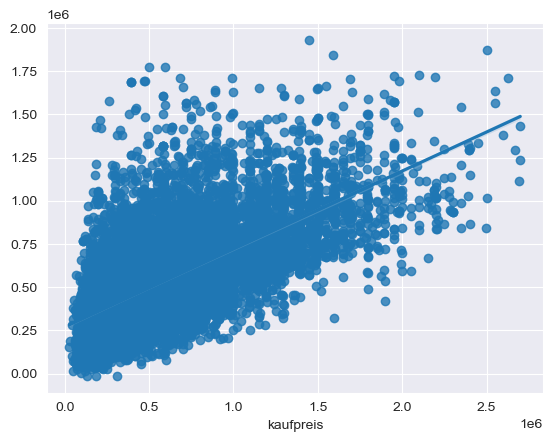

In [372]:
X = df_characteristics[['wohnflaeche', 'grundstuecksflaeche', 'zimmeranzahl', 'schlafzimmer', 'badezimmer','keller', 'parkplatz', 'age', 'objektzustand']]
Y = df_characteristics['kaufpreis']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

print('Intercept:')
print(model.intercept_)

coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
#print(coeff_parameter)

predictions = model.predict(X_test)

sns.regplot(x=y_test, y=predictions)

X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

In [373]:
#Tutorial: https://github.com/mwburke/stargazer/blob/master/examples.ipynb 
from stargazer.stargazer import Stargazer
stargazer_tab = Stargazer([ls])
stargazer_tab.custom_columns('Model 1')
stargazer_tab.significant_digits(2)
stargazer_tab.covariate_order(['const', 'age', 'wohnflaeche', 'zimmeranzahl', 'grundstuecksflaeche', 'schlafzimmer', 'badezimmer', 'parkplatz', 'keller', 'objektzustand'])
stargazer_tab.rename_covariates({
    'age': 'Age', 
    'badezimmer': 'Number of bathrooms', 
    'const': 'Intercept', 
    'grundstuecksflaeche': 'Land area',
    'keller': 'Cellar', 
    'objektzustand': 'Object condition', 
    'parkplatz': 'Parkingspace', 
    'schlafzimmer': 'Number of bedrooms', 
    'wohnflaeche': 'Living space', 
    'zimmeranzahl': 'Number of rooms'
    })
open('./Regression-Output/regression-1_hk_cities.tex', 'w').write(stargazer_tab.render_latex())
stargazer_tab

## Macroeconomic factors only

### Merge interest rate, construction investment and household income

In [374]:
def convert_date(x):
    date_string = str(x)
    date = date_string.split('m')[-1]
    if (date == '1' or date == '2' or date == '3'):
        quarter = '1'
    elif (date == '4' or date == '5' or date == '6'):
        quarter = '2'
    elif (date == '7' or date == '8' or date == '9'):
        quarter = '3'
    elif (date == '10' or date == '11' or date == '12'):
        quarter = '4'
    else:
        quarter = '0'
    
    year = date_string.split('m')[0]
    new_date = year + '-Q' + quarter
    return new_date

df_original['date_quarter'] = df_original.apply(lambda x: convert_date(x['edat']), axis = 1)

df_original.drop(columns=['obid', 'plz', 'baujahr', 'wohnflaeche', 'grundstuecksflaeche', 'zimmeranzahl', 'schlafzimmer', 'badezimmer', 'parkplatz', 'objektzustand', 'edat', 'edat_year', 'keller'], axis=1, inplace=True)
df_original = df_original.groupby('date_quarter', as_index=False).mean()

interest_rate = pd.read_csv('./Data/Macroeconomic Data/Interest-rate.csv')
df_interest_rate = pd.DataFrame(interest_rate)
df_interest_rate['interest_rate'] = df_interest_rate['interest_rate'] / 100
df_original = pd.merge(df_original, df_interest_rate, how="inner", on="date_quarter")

construction_investment = pd.read_csv('./Data/Macroeconomic Data/Construction-investment.csv')
df_construction_investment = pd.DataFrame(construction_investment)
df_original = pd.merge(df_original, df_construction_investment, how="inner", on="date_quarter")

household_income = pd.read_csv('./Data/Macroeconomic Data/Household-income.csv')
df_household_income = pd.DataFrame(household_income)
df_original = pd.merge(df_original, df_household_income, how="inner", on="date_quarter")

df_original.head()

,date_quarter,kaufpreis,price_sqm,interest_rate,housing_construction_investment,household_income
0,2007-Q1,303232.918568,1940.250881,0.04737,5.410,1584484
1,2007-Q2,306227.071878,1962.724220,0.04899,5.141,1568216
2,2007-Q3,309530.774514,1958.637008,0.05136,5.148,1579972
3,2007-Q4,308506.226560,1951.208605,0.05034,5.133,1633608
4,2008-Q1,299825.650740,1901.326637,0.04946,5.241,1626592


### Clean Unemployment and merge

In [375]:
unemployment_rate = pd.read_csv('./Data/Macroeconomic Data/Unemployment-rate.csv')
df_unemployment_rate = pd.DataFrame(unemployment_rate)

def convert_date_unemployment(x):
    date_string = str(x)
    date = date_string.split('-')[-1]
    
    if (date == 'Januar' or date == 'Februar' or date == 'März'):
        quarter = '1'
    elif (date == 'April' or date == 'Mai' or date == 'Juni'):
        quarter = '2'
    elif (date == 'Juli' or date == 'August' or date == 'September'):
        quarter = '3'
    elif (date == 'Oktober' or date == 'November' or date == 'Dezember'):
        quarter = '4'
    else:
        quarter = '0'
    year = date_string.split('-')[0]
    new_date = year + '-Q' + quarter
    return new_date

df_unemployment_rate['date_quarter'] = df_unemployment_rate.apply(lambda x: convert_date_unemployment(x['Jahr_Monat']), axis = 1)
df_unemployment_rate = df_unemployment_rate.groupby('date_quarter', as_index=False).sum()
df_unemployment_rate.drop(columns=['Erwerbspersonen', 'Erwerbstätige', 'Erwerbslose'], axis=1, inplace=True)

df_unemployment_rate['Erwerbslosenquote'] = df_unemployment_rate['Erwerbslosenquote'] / 100

df_original = pd.merge(df_original, df_unemployment_rate, how="inner", on="date_quarter")

df_original.head()

/var/folders/5h/0pnj053913z2cl2pgkgr888h0000gp/T/ipykernel_1914/24335118.py:23: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_unemployment_rate = df_unemployment_rate.groupby('date_quarter', as_index=False).sum()


,date_quarter,kaufpreis,price_sqm,interest_rate,housing_construction_investment,household_income,Erwerbslosenquote
0,2007-Q1,303232.918568,1940.250881,0.04737,5.410,1584484,0.274
1,2007-Q2,306227.071878,1962.724220,0.04899,5.141,1568216,0.263
2,2007-Q3,309530.774514,1958.637008,0.05136,5.148,1579972,0.252
3,2007-Q4,308506.226560,1951.208605,0.05034,5.133,1633608,0.244
4,2008-Q1,299825.650740,1901.326637,0.04946,5.241,1626592,0.235


### Clean planning permissions and merge

In [376]:
planning_permissions = pd.read_csv('./Data/Macroeconomic Data/Planning-permissions.csv')
df_planning_permissions_original = pd.DataFrame(planning_permissions)

df_planning_permissions = pd.DataFrame(np.repeat(df_planning_permissions_original.values, 4, axis=0))
df_planning_permissions.columns = df_planning_permissions_original.columns

def rowIndex(row):
    return row.name
df_planning_permissions['rowIndex'] = df_planning_permissions.apply(rowIndex, axis=1)

def add_quarter(Jahr, rowIndex):
    if (rowIndex % 4 == 0):
        quarter = 'Q1'
    elif (rowIndex % 4 == 1):
        quarter = 'Q2'
    elif (rowIndex % 4 == 2):
        quarter = 'Q3'
    elif (rowIndex % 4 == 3):
        quarter = 'Q4'
    else:
        quarter = '0'
    date_quarter = Jahr.astype(str) + '-' + quarter
    return date_quarter
df_planning_permissions['date_quarter'] = df_planning_permissions.apply(lambda x: add_quarter(x.Jahr, x.rowIndex), axis = 1)

df_planning_permissions.drop(columns=['Jahr', 'rowIndex'], axis=1, inplace=True)
df_planning_permissions['Baugenehmigungen'] = df_planning_permissions['Baugenehmigungen'].div(4)

df_original = pd.merge(df_original, df_planning_permissions, how="inner", on="date_quarter")

df_original.head()

,date_quarter,kaufpreis,price_sqm,interest_rate,housing_construction_investment,household_income,Erwerbslosenquote,Baugenehmigungen
0,2007-Q1,303232.918568,1940.250881,0.04737,5.410,1584484,0.274,45.50
1,2007-Q2,306227.071878,1962.724220,0.04899,5.141,1568216,0.263,45.50
2,2007-Q3,309530.774514,1958.637008,0.05136,5.148,1579972,0.252,45.50
3,2007-Q4,308506.226560,1951.208605,0.05034,5.133,1633608,0.244,45.50
4,2008-Q1,299825.650740,1901.326637,0.04946,5.241,1626592,0.235,43.75


### Number of transactions

In [377]:
def convert_date(x):
    date_string = str(x)
    date = date_string.split('m')[-1]
    if (date == '1' or date == '2' or date == '3'):
        quarter = '1'
    elif (date == '4' or date == '5' or date == '6'):
        quarter = '2'
    elif (date == '7' or date == '8' or date == '9'):
        quarter = '3'
    elif (date == '10' or date == '11' or date == '12'):
        quarter = '4'
    else:
        quarter = '0'
    
    year = date_string.split('m')[0]
    new_date = year + '-Q' + quarter
    return new_date

df_hk_cities['date_quarter'] = df_hk_cities.apply(lambda x: convert_date(x['edat']), axis = 1)


df_hk_cities = df_hk_cities.groupby('date_quarter', as_index=False).count()
df_hk_cities['transactions'] = df_hk_cities['kaufpreis']
df_hk_cities.drop(columns=['obid', 'plz', 'kaufpreis', 'baujahr', 'wohnflaeche', 'grundstuecksflaeche', 'zimmeranzahl', 'schlafzimmer', 'badezimmer', 'parkplatz', 'objektzustand', 'edat', 'price_sqm', 'edat_year', 'keller'], axis=1, inplace=True)

df_original = pd.merge(df_original, df_hk_cities, how="inner", on="date_quarter")

df_original.head()
print(df_original.dtypes)


date_quarter                        object
kaufpreis                          float64
price_sqm                          float64
interest_rate                      float64
housing_construction_investment    float64
household_income                     int64
Erwerbslosenquote                  float64
Baugenehmigungen                   float64
transactions                         int64
dtype: object


### Regression analysis Macroeconomic factors only

#### Train and test dataset

(49, 6)
(13, 6)
(49,)
(13,)
                            OLS Regression Results                            
Dep. Variable:              kaufpreis   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     339.8
Date:                Wed, 26 Apr 2023   Prob (F-statistic):           6.19e-34
Time:                        13:56:17   Log-Likelihood:                -556.94
No. Observations:                  49   AIC:                             1128.
Df Residuals:                      42   BIC:                             1141.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

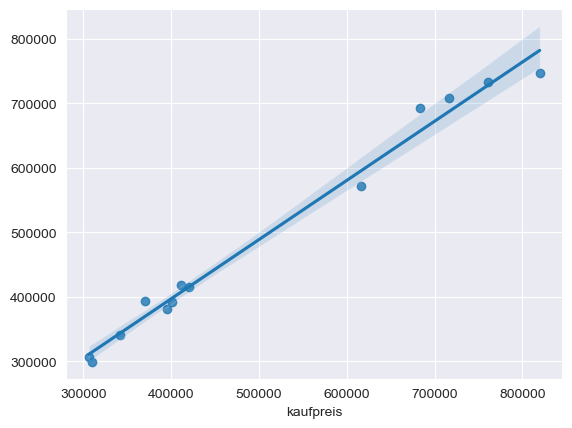

In [378]:
X = df_original[['interest_rate', 'Erwerbslosenquote', 'household_income', 'housing_construction_investment', 'Baugenehmigungen', 'transactions']]
Y = df_original['kaufpreis']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

model = LinearRegression()
model.fit(X_train,y_train)

#print('Intercept:')
#print(model.intercept_)

coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
#print(coeff_parameter)

predictions = model.predict(X_test)
sns.regplot(x=y_test, y=predictions)

X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

In [379]:
from stargazer.stargazer import Stargazer
stargazer_tab = Stargazer([ls])
stargazer_tab.custom_columns('Model 2')
stargazer_tab.significant_digits(2)
stargazer_tab.covariate_order(['const', 'interest_rate', 'Erwerbslosenquote', 'household_income', 'housing_construction_investment', 'Baugenehmigungen', 'transactions'])
stargazer_tab.rename_covariates({
    'interest_rate': 'Interest rate', 
    'Erwerbslosenquote': 'Unemployement rate', 
    'const': 'Intercept', 
    'household_income': 'Income per household',
    'housing_construction_investment': 'Investment in housing construction as percentage of BIP', 
    'Baugenehmigungen': 'Number of construction permissions', 
    'transactions': 'Number of transactions'
    })
open('./Regression-Output/regression-2_hk_cities.tex', 'w').write(stargazer_tab.render_latex())
stargazer_tab

## Macroeconomic factors monthly data

### Merge interest rate

In [380]:
def convert_date(x):
    date_string = str(x)
    date_int = int(date_string.split('m')[-1])
    if (date_int < 10):
        date = '0' + str(date_int)
    else:
        date = str(date_int)
    year = date_string.split('m')[0]
    new_date = year + '-' + date
    return new_date

df_original_2['date_month'] = df_original_2.apply(lambda x: convert_date(x['edat']), axis = 1)

df_original_2.drop(columns=['obid', 'plz', 'baujahr', 'wohnflaeche', 'grundstuecksflaeche', 'zimmeranzahl', 'schlafzimmer', 'badezimmer', 'parkplatz', 'objektzustand', 'edat', 'edat_year', 'keller'], axis=1, inplace=True)
df_original_2 = df_original_2.groupby('date_month', as_index=False).mean().sort_values('date_month')

def convert_date_interest(x):
    date_string = str(x)
    new_date = date_string[:-3]
    return new_date

interest_rate = pd.read_csv('./Data/Macroeconomic Data/Interest-rate-monthly.csv')
df_interest_rate = pd.DataFrame(interest_rate)
df_interest_rate['date_month'] = df_interest_rate.apply(lambda x: convert_date_interest(x['date']), axis=1)
df_interest_rate.drop(columns=['date'])
df_original_2 = pd.merge(df_original_2, df_interest_rate, how="inner", on="date_month")

print(len(df_original_2.index) / 12)
df_original_2.head()

16.0


,date_month,kaufpreis,price_sqm,date,interest_rate
0,2007-01,300143.693462,1920.458396,2007-01-01,4.016818
1,2007-02,299611.231962,1934.950199,2007-02-01,4.049000
2,2007-03,310195.163187,1967.406822,2007-03-01,3.940909
3,2007-04,304416.778038,1957.640747,2007-04-01,4.152105
4,2007-05,300401.340117,1941.173548,2007-05-01,4.279048


### Merge construction investment and household income

In [381]:
construction_investment = pd.read_csv('./Data/Macroeconomic Data/Construction-investment.csv')
df_construction_investment_original = pd.DataFrame(construction_investment)
df_construction_investment = pd.DataFrame(np.repeat(df_construction_investment_original.values, 3, axis=0))
df_construction_investment.columns = df_construction_investment_original.columns

def rowIndex(row):
    return row.name

def add_month(date_quarter, rowIndex):
    if (rowIndex % 12 == 0):
        month = '01'
    elif (rowIndex % 12 == 1):
        month = '02'
    elif (rowIndex % 12 == 2):
        month = '03'
    elif (rowIndex % 12 == 3):
        month = '04'
    elif (rowIndex % 12 == 4):
        month = '05'
    elif (rowIndex % 12 == 5):
        month = '06'
    elif (rowIndex % 12 == 6):
        month = '07'
    elif (rowIndex % 12 == 7):
        month = '08'
    elif (rowIndex % 12 == 8):
        month = '09'
    elif (rowIndex % 12 == 9):
        month = '10'
    elif (rowIndex % 12 == 10):
        month = '11'
    elif (rowIndex % 12 == 11):
        month = '12'
    else:
        month = '0'
        
    date_string = str(date_quarter)
    year = date_string.split('-')[0]
    date_month = year + '-' + month
    return date_month

df_construction_investment['rowIndex'] = df_construction_investment.apply(rowIndex, axis=1)
df_construction_investment['date_month'] = df_construction_investment.apply(lambda x: add_month(x.date_quarter, x.rowIndex), axis = 1)
df_construction_investment.drop(columns=['date_quarter', 'rowIndex'], axis=1, inplace=True)
df_original_2 = pd.merge(df_original_2, df_construction_investment, how="inner", on="date_month")

household_income = pd.read_csv('./Data/Macroeconomic Data/Disposable-income.csv')
df_household_income_original = pd.DataFrame(household_income)
df_household_income = pd.DataFrame(np.repeat(df_household_income_original.values, 3, axis=0))
df_household_income.columns = df_household_income_original.columns

df_household_income['rowIndex'] = df_household_income.apply(rowIndex, axis=1)
df_household_income['date_month'] = df_household_income.apply(lambda x: add_month(x.date_quarter, x.rowIndex), axis = 1)
df_household_income['disposable_income'] = df_household_income['disposable_income'].div(3)
df_household_income.drop(columns=['date_quarter', 'rowIndex'], axis=1, inplace=True)
df_original_2 = pd.merge(df_original_2, df_household_income, how="inner", on="date_month")

df_original_2['disposable_income'] = pd.to_numeric(df_original_2['disposable_income'])
df_original_2['housing_construction_investment'] = pd.to_numeric(df_original_2['housing_construction_investment'])

df_original_2

,date_month,kaufpreis,price_sqm,date,interest_rate,housing_construction_investment,disposable_income
0,2007-01,300143.693462,1920.458396,2007-01-01,4.016818,5.410,125.261333
1,2007-02,299611.231962,1934.950199,2007-02-01,4.049000,5.410,125.261333
2,2007-03,310195.163187,1967.406822,2007-03-01,3.940909,5.410,125.261333
3,2007-04,304416.778038,1957.640747,2007-04-01,4.152105,5.141,123.930000
4,2007-05,300401.340117,1941.173548,2007-05-01,4.279048,5.141,123.930000
...,...,...,...,...,...,...,...
187,2022-08,811722.412037,4788.309503,2022-08-01,1.034348,7.618,188.779667
188,2022-09,813144.425555,4826.208499,2022-09-01,1.795455,7.618,188.779667
189,2022-10,771510.374831,4606.262936,2022-10-01,2.186667,7.369,192.490000
190,2022-11,769097.715768,4670.612010,2022-11-01,2.066364,7.369,192.490000


### Clean Unemployment and merge

In [382]:
unemployment_rate = pd.read_csv('./Data/Macroeconomic Data/Unemployment-rate.csv')
df_unemployment_rate = pd.DataFrame(unemployment_rate)


def convert_date_unemployment(x):
    date_string = str(x)
    date = date_string.split('-')[-1]
    
    if (date == 'Januar'):
        month = '01'
    elif (date == 'Februar'):
        month = '02'
    elif (date == 'März'):
        month = '03'
    elif (date == 'April'):
        month = '04'
    elif (date == 'Mai'):
        month = '05'
    elif (date == 'Juni'):
        month = '06'
    elif (date == 'Juli'):
        month = '07'
    elif (date == 'August'):
        month = '08'
    elif (date == 'September'):
        month = '09'
    elif (date == 'Oktober'):
        month = '10'
    elif (date == 'November'):
        month = '11'
    elif (date == 'Dezember'):
        month = '12'
    else:
        date = '0'
    year = date_string.split('-')[0]
    new_date = year + '-' + month
    return new_date

df_unemployment_rate['rowIndex'] = df_unemployment_rate.apply(rowIndex, axis=1)
df_unemployment_rate['date_month'] = df_unemployment_rate.apply(lambda x: convert_date_unemployment(x['Jahr_Monat']), axis = 1)
df_unemployment_rate.drop(columns=['Erwerbspersonen', 'Erwerbstätige', 'Erwerbslose', 'Jahr_Monat', 'rowIndex'], axis=1, inplace=True)

df_unemployment_rate
df_original_2 = pd.merge(df_original_2, df_unemployment_rate, how="inner", on="date_month")

df_original_2.head()

,date_month,kaufpreis,price_sqm,date,interest_rate,housing_construction_investment,disposable_income,Erwerbslosenquote
0,2007-01,300143.693462,1920.458396,2007-01-01,4.016818,5.410,125.261333,9.3
1,2007-02,299611.231962,1934.950199,2007-02-01,4.049000,5.410,125.261333,9.1
2,2007-03,310195.163187,1967.406822,2007-03-01,3.940909,5.410,125.261333,9.0
3,2007-04,304416.778038,1957.640747,2007-04-01,4.152105,5.141,123.930000,8.9
4,2007-05,300401.340117,1941.173548,2007-05-01,4.279048,5.141,123.930000,8.8


### Clean planning permissions and merge

In [383]:
planning_permissions = pd.read_csv('./Data/Macroeconomic Data/Planning-permissions.csv')
df_planning_permissions_original = pd.DataFrame(planning_permissions)

df_planning_permissions = pd.DataFrame(np.repeat(df_planning_permissions_original.values, 12, axis=0))
df_planning_permissions.columns = df_planning_permissions_original.columns

def rowIndex(row):
    return row.name
df_planning_permissions['rowIndex'] = df_planning_permissions.apply(rowIndex, axis=1)

def add_month(date_quarter, rowIndex):
    if (rowIndex % 12 == 0):
        month = '01'
    elif (rowIndex % 12 == 1):
        month = '02'
    elif (rowIndex % 12 == 2):
        month = '03'
    elif (rowIndex % 12 == 3):
        month = '04'
    elif (rowIndex % 12 == 4):
        month = '05'
    elif (rowIndex % 12 == 5):
        month = '06'
    elif (rowIndex % 12 == 6):
        month = '07'
    elif (rowIndex % 12 == 7):
        month = '08'
    elif (rowIndex % 12 == 8):
        month = '09'
    elif (rowIndex % 12 == 9):
        month = '10'
    elif (rowIndex % 12 == 10):
        month = '11'
    elif (rowIndex % 12 == 11):
        month = '12'
    else:
        month = '0'
        
    date_string = str(date_quarter)
    year = date_string.split('-')[0]
    date_month = year + '-' + month
    return date_month

df_planning_permissions['date_month'] = df_planning_permissions.apply(lambda x: add_month(x.Jahr, x.rowIndex), axis = 1)

df_planning_permissions.drop(columns=['Jahr', 'rowIndex'], axis=1, inplace=True)
df_planning_permissions['Baugenehmigungen'] = df_planning_permissions['Baugenehmigungen'].div(12)

df_original_2 = pd.merge(df_original_2, df_planning_permissions, how="inner", on="date_month")

df_original_2.head()
print(df_original_2.dtypes)
print(df_original_2['housing_construction_investment'].isna().sum())


date_month                          object
kaufpreis                          float64
price_sqm                          float64
date                                object
interest_rate                      float64
housing_construction_investment    float64
disposable_income                  float64
Erwerbslosenquote                  float64
Baugenehmigungen                   float64
dtype: object
0


### Clean GDP per capita and merge

In [384]:
gdp_per_capita = pd.read_csv('./Data/Macroeconomic Data/GDP-per-capita.csv')
df_gdp_per_capita_original = pd.DataFrame(gdp_per_capita)

df_gdp_per_capita = pd.DataFrame(np.repeat(df_gdp_per_capita_original.values, 12, axis=0))
df_gdp_per_capita.columns = df_gdp_per_capita_original.columns

def rowIndex(row):
    return row.name
df_gdp_per_capita['rowIndex'] = df_gdp_per_capita.apply(rowIndex, axis=1)

def add_month(date_quarter, rowIndex):
    if (rowIndex % 12 == 0):
        month = '01'
    elif (rowIndex % 12 == 1):
        month = '02'
    elif (rowIndex % 12 == 2):
        month = '03'
    elif (rowIndex % 12 == 3):
        month = '04'
    elif (rowIndex % 12 == 4):
        month = '05'
    elif (rowIndex % 12 == 5):
        month = '06'
    elif (rowIndex % 12 == 6):
        month = '07'
    elif (rowIndex % 12 == 7):
        month = '08'
    elif (rowIndex % 12 == 8):
        month = '09'
    elif (rowIndex % 12 == 9):
        month = '10'
    elif (rowIndex % 12 == 10):
        month = '11'
    elif (rowIndex % 12 == 11):
        month = '12'
    else:
        month = '0'
        
    date_string = str(date_quarter)
    year = date_string.split('-')[0]
    date_month = year + '-' + month
    return date_month

df_gdp_per_capita['date_month'] = df_gdp_per_capita.apply(lambda x: add_month(x.Jahr, x.rowIndex), axis = 1)
df_gdp_per_capita['BIP_pro_kopf'] = df_gdp_per_capita['BIP_pro_kopf'].div(12)
df_gdp_per_capita.drop(columns=['Jahr', 'rowIndex'], axis=1, inplace=True)

df_original_2 = pd.merge(df_original_2, df_gdp_per_capita, how="inner", on="date_month")

df_original_2.head()

,date_month,kaufpreis,price_sqm,date,interest_rate,housing_construction_investment,disposable_income,Erwerbslosenquote,Baugenehmigungen,BIP_pro_kopf
0,2007-01,300143.693462,1920.458396,2007-01-01,4.016818,5.410,125.261333,9.3,15.166667,2571.833333
1,2007-02,299611.231962,1934.950199,2007-02-01,4.049000,5.410,125.261333,9.1,15.166667,2571.833333
2,2007-03,310195.163187,1967.406822,2007-03-01,3.940909,5.410,125.261333,9.0,15.166667,2571.833333
3,2007-04,304416.778038,1957.640747,2007-04-01,4.152105,5.141,123.930000,8.9,15.166667,2571.833333
4,2007-05,300401.340117,1941.173548,2007-05-01,4.279048,5.141,123.930000,8.8,15.166667,2571.833333


### Regression analysis Macroeconomic factors monthly data

(153, 6)
(39, 6)
(153,)
(39,)
                            OLS Regression Results                            
Dep. Variable:              kaufpreis   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     986.2
Date:                Wed, 26 Apr 2023   Prob (F-statistic):          1.92e-115
Time:                        13:56:20   Log-Likelihood:                -1771.2
No. Observations:                 153   AIC:                             3556.
Df Residuals:                     146   BIC:                             3578.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

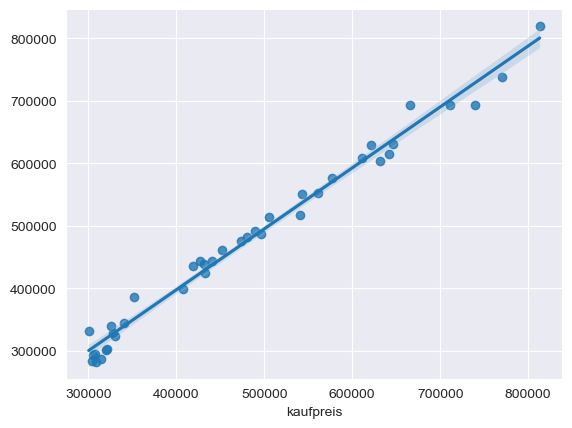

In [385]:
#X = df_original_2[['interest_rate', 'Erwerbslosenquote', 'household_income', 'housing_construction_investment', 'Baugenehmigungen']]
X = df_original_2[['interest_rate', 'Erwerbslosenquote', 'housing_construction_investment', 'disposable_income', 'Baugenehmigungen', 'BIP_pro_kopf']]
Y = df_original_2['kaufpreis']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

model = LinearRegression()
model.fit(X_train,y_train)

#print('Intercept:')
#print(model.intercept_)

coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
#print(coeff_parameter)

predictions = model.predict(X_test)
sns.regplot(x=y_test, y=predictions)

X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm, missing='raise').fit()
print(ls.summary())

In [386]:
from stargazer.stargazer import Stargazer
stargazer_tab = Stargazer([ls])
stargazer_tab.custom_columns('Model 4')
stargazer_tab.significant_digits(2)
stargazer_tab.covariate_order(['const', 'interest_rate', 'Erwerbslosenquote', 'disposable_income', 'housing_construction_investment', 'Baugenehmigungen', 'BIP_pro_kopf'])
stargazer_tab.rename_covariates({
    'interest_rate': 'Interest rate', 
    'Erwerbslosenquote': 'Unemployement rate', 
    'const': 'Intercept', 
    'disposable_income': 'disposable_income',
    'housing_construction_investment': 'Investment in housing construction as percentage of GDP', 
    'Baugenehmigungen': 'Number of construction permissions', 
    })
open('./Regression-Output/regression-4_hk_cities.tex', 'w').write(stargazer_tab.render_latex())
stargazer_tab

## Characteristics and Macroeconomic factors combined

### Merge of characteristics and macroeconomic factors dataset

In [387]:
df_both_factors = df_characteristics.copy(deep=True)

def convert_date(x):
    date_string = str(x)
    date = date_string.split('m')[-1]
    if (date == '1' or date == '2' or date == '3'):
        quarter = '1'
    elif (date == '4' or date == '5' or date == '6'):
        quarter = '2'
    elif (date == '7' or date == '8' or date == '9'):
        quarter = '3'
    elif (date == '10' or date == '11' or date == '12'):
        quarter = '4'
    else:
        quarter = '0'
    
    year = date_string.split('m')[0]
    new_date = year + '-Q' + quarter
    return new_date

df_both_factors['date_quarter'] = df_both_factors.apply(lambda x: convert_date(x['edat']), axis = 1)

df_original.drop(columns=['kaufpreis', 'price_sqm'], axis=1, inplace=True)
df_both_factors = pd.merge(df_both_factors, df_original, how="left", on="date_quarter")
df_both_factors = df_both_factors.dropna(subset=['household_income'])

print(df_both_factors.shape)
df_both_factors.head()


(127321, 23)


,obid,plz,kaufpreis,baujahr,wohnflaeche,grundstuecksflaeche,zimmeranzahl,schlafzimmer,badezimmer,keller,...,price_sqm,edat_year,age,date_quarter,interest_rate,housing_construction_investment,household_income,Erwerbslosenquote,Baugenehmigungen,transactions
0,41283408,22415,150000.0,1956.0,100.0,1000.0,4.0,3,1,0,...,1500.0000,2007,51.0,2007-Q2,0.04899,5.141,1568216.0,0.263,45.5,5740.0
1,41172942,22419,290000.0,1964.0,189.0,600.0,8.0,5,3,0,...,1534.3915,2007,43.0,2007-Q2,0.04899,5.141,1568216.0,0.263,45.5,5740.0
2,40161496,22149,398000.0,1900.0,229.0,1113.0,11.0,5,3,0,...,1737.9912,2007,107.0,2007-Q2,0.04899,5.141,1568216.0,0.263,45.5,5740.0
3,41868056,22143,359000.0,1979.0,160.0,424.0,5.0,3,2,0,...,2243.7500,2007,28.0,2007-Q3,0.05136,5.148,1579972.0,0.252,45.5,6001.0
4,42725616,22459,429000.0,2008.0,120.0,330.0,5.0,2,1,0,...,3575.0000,2007,-1.0,2007-Q3,0.05136,5.148,1579972.0,0.252,45.5,6001.0


### Regression on characteristics and macroeconomic factors

#### Test and train data set

(101856, 15)
(25465, 15)
(101856,)
(25465,)
                            OLS Regression Results                            
Dep. Variable:              kaufpreis   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     9155.
Date:                Wed, 26 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:56:27   Log-Likelihood:            -1.3915e+06
No. Observations:              101856   AIC:                         2.783e+06
Df Residuals:                  101840   BIC:                         2.783e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

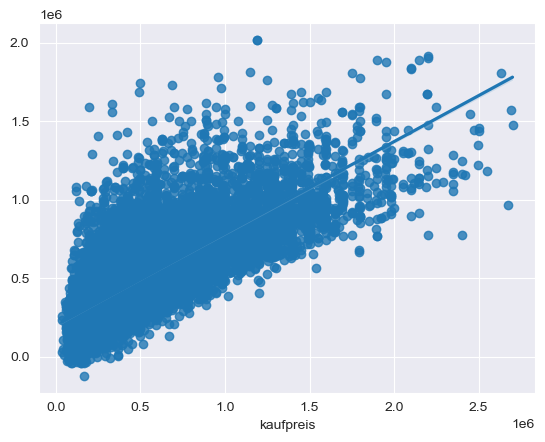

In [388]:
X = df_both_factors[['interest_rate', 'Erwerbslosenquote', 'household_income', 'housing_construction_investment', 'Baugenehmigungen', 'transactions', 'wohnflaeche', 'grundstuecksflaeche', 'zimmeranzahl', 'schlafzimmer', 'badezimmer', 'keller', 'parkplatz', 'age','objektzustand']]
Y = df_both_factors['kaufpreis']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

model = LinearRegression()
model.fit(X_train,y_train)

#print('Intercept:')
#print(model.intercept_)

coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
#print(coeff_parameter)

predictions = model.predict(X_test)
sns.regplot(x=y_test, y=predictions)

X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

In [389]:
from stargazer.stargazer import Stargazer
stargazer_tab = Stargazer([ls])
stargazer_tab.custom_columns('Model 3')
stargazer_tab.significant_digits(2)
stargazer_tab.covariate_order(['const', 'interest_rate', 'Erwerbslosenquote', 'household_income', 'housing_construction_investment', 'Baugenehmigungen', 'transactions', 'age', 'wohnflaeche', 'zimmeranzahl', 'grundstuecksflaeche', 'schlafzimmer', 'badezimmer', 'parkplatz', 'keller', 'objektzustand'])
stargazer_tab.rename_covariates({
    'interest_rate': 'Interest rate', 
    'Erwerbslosenquote': 'Unemployement rate', 
    'const': 'Intercept', 
    'household_income': 'Income per household',
    'housing_construction_investment': 'Investment in housing construction as percentage of BIP', 
    'Baugenehmigungen': 'Number of construction permissions', 
    'transactions': 'Number of transactions',
    'age': 'Age', 
    'badezimmer': 'Number of bathrooms', 
    'const': 'Intercept', 
    'grundstuecksflaeche': 'Land area',
    'keller': 'Cellar', 
    'objektzustand': 'Object condition', 
    'parkplatz': 'Parkingspace', 
    'schlafzimmer': 'Number of bedrooms', 
    'wohnflaeche': 'Living space', 
    'zimmeranzahl': 'Number of rooms'
    })
open('./Regression-Output/regression-3_hk_cities.tex', 'w').write(stargazer_tab.render_latex())
stargazer_tab

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


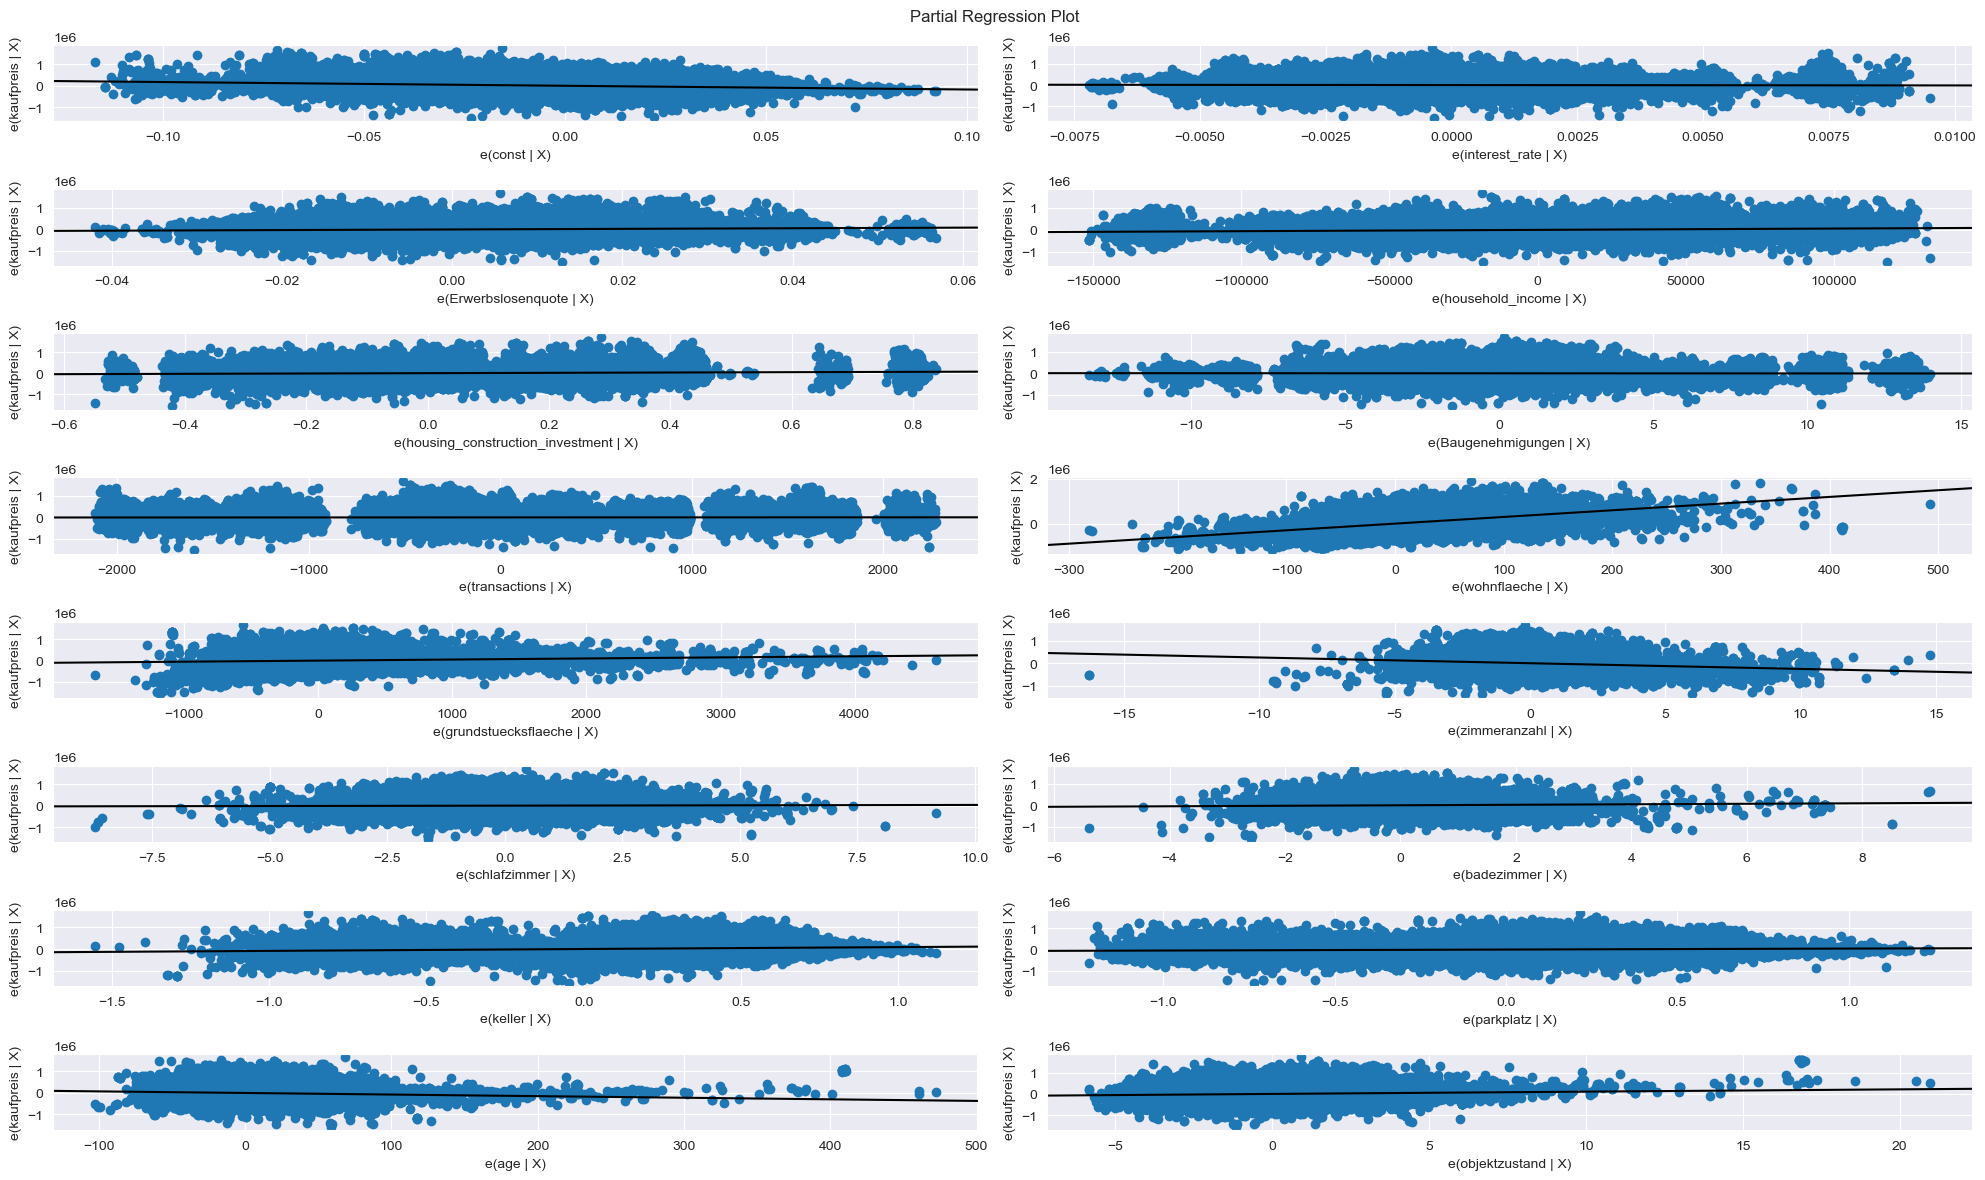

In [390]:
fig = plt.figure(figsize=(20,12))
fig = sm.graphics.plot_partregress_grid(ls, fig=fig)